In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nettoyage des données
def nettoyer_covid():
    df_covid = pd.read_csv('covid19.csv')
    print("Nombre de lignes au début:", len(df_covid))
    
    # Liste complète des colonnes numériques d'après votre CSV
    colonnes_numeriques = [
        'Confirmed', 'Deaths', 'Recovered', 'Active', 
        'New cases', 'New deaths', 'New recovered',
        'Deaths / 100 Cases', 'Recovered / 100 Cases',
        'Deaths / 100 Recovered', 'Confirmed last week',
        '1 week change', '1 week % increase', 'WHO Region'
    ]
    
    # 1. Suppression des valeurs manquantes
    df_clean = df_covid.dropna()
    print("Après suppression des NA:", len(df_clean))
    
    # 2. Conversion des colonnes en type numérique
    for col in colonnes_numeriques:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # 3. Remplacement des valeurs négatives par 0
    for col in colonnes_numeriques:
        df_clean[col] = df_clean[col].clip(lower=0)
    
    # 4. Suppression des doublons
    df_clean = df_clean.drop_duplicates()
    print("Après suppression des doublons:", len(df_clean))
    
    # 5. Traitement des outliers
    for col in colonnes_numeriques:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[~((df_clean[col] < (Q1 - 1.5 * IQR)) | (df_clean[col] > (Q3 + 1.5 * IQR)))]
    print("Après traitement des outliers:", len(df_clean))
    
    return df_clean

# Appliquer le nettoyage
df_covid_clean = nettoyer_covid()


Nombre de lignes au début: 187
Après suppression des NA: 187
Après suppression des doublons: 187
Après traitement des outliers: 48


Aperçu des données :
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526  

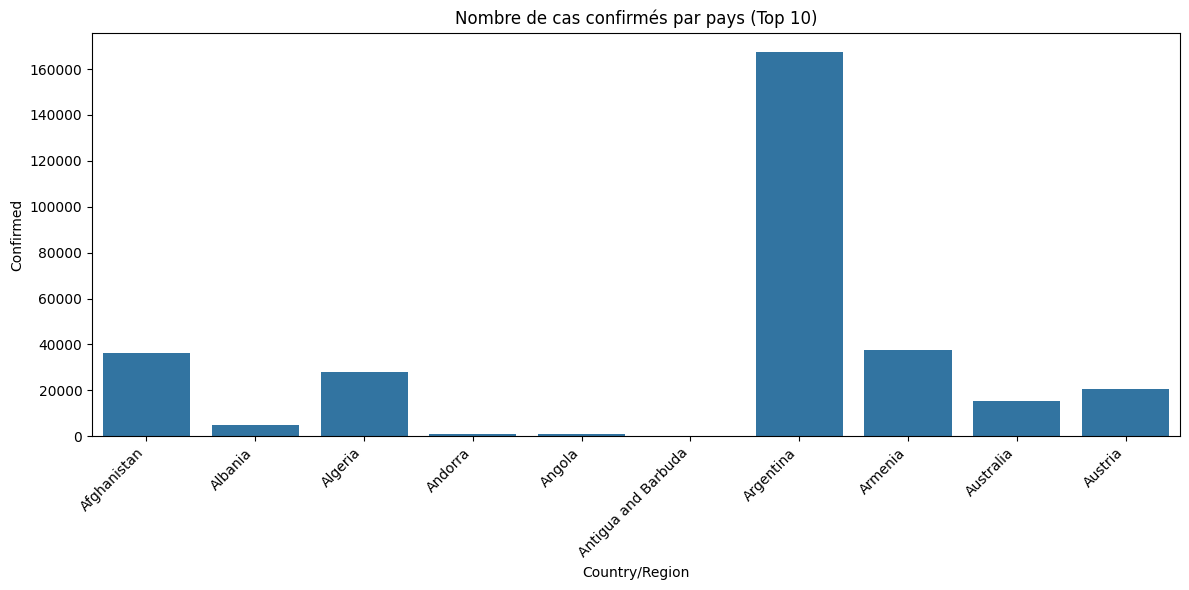

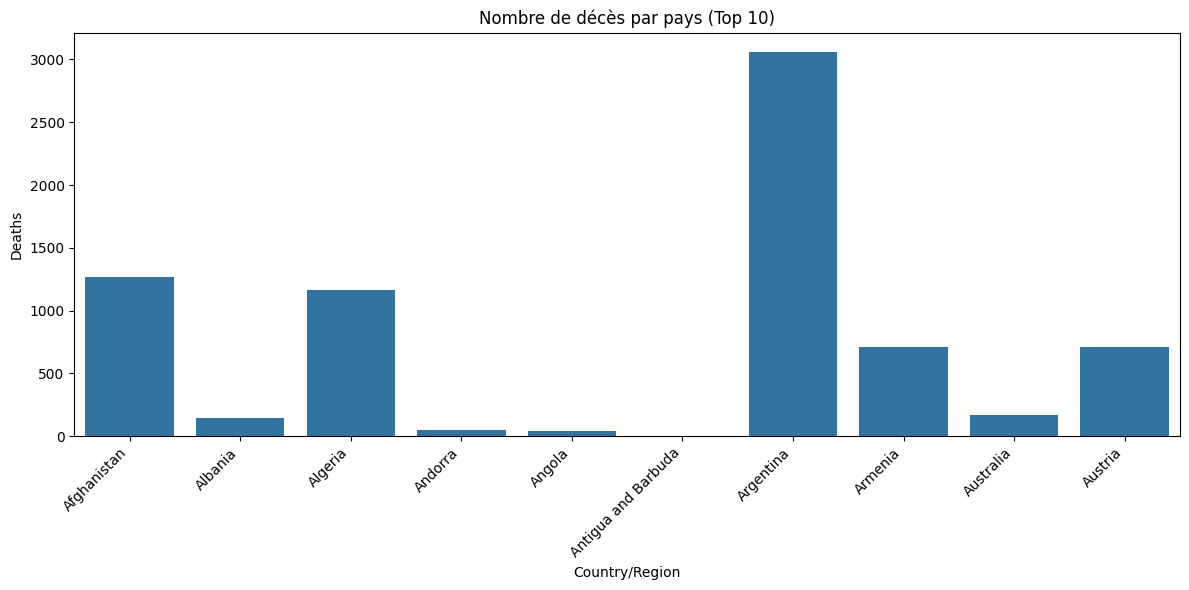

In [5]:
# Import des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier CSV
df = pd.read_csv('covid19.csv')

# Afficher les premières lignes du DataFrame
print("Aperçu des données :")
print(df.head())

# Afficher les informations sur le DataFrame
print("\nInformations sur le dataset :")
print(df.info())

# Créer quelques visualisations de base
plt.figure(figsize=(12, 6))
sns.barplot(data=df.head(10), x='Country/Region', y='Confirmed')
plt.xticks(rotation=45, ha='right')
plt.title('Nombre de cas confirmés par pays (Top 10)')
plt.tight_layout()
plt.show()

# Visualisation des décès
plt.figure(figsize=(12, 6))
sns.barplot(data=df.head(10), x='Country/Region', y='Deaths')
plt.xticks(rotation=45, ha='right')
plt.title('Nombre de décès par pays (Top 10)')
plt.tight_layout()
plt.show()